<a href="https://colab.research.google.com/github/veashwarcharan30-alt/Analysis-on-steel-industry-energy-consumption-/blob/main/Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project ppt
canva link : https://www.canva.com/design/DAGw0ZPVag4/n4sahn3odVWKAECpgTMQFw/edit?utm_content=DAGw0ZPVag4&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("imported libraries sucessfully!")

imported libraries sucessfully!


In [ ]:
#loading the data set
df=pd.read_csv('/content/Steel_industry_data.csv')


In [ ]:
#total no of rows and columns in the dataset
df.shape

(35040, 11)

In [ ]:
# names of the columns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
#list of the first 5 rows
df.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
#list of the last 5  rows
df.tail(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [ ]:
# checking for  null values
df.isnull().sum()

,0
date,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2(tCO2),0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0


In [ ]:
#checking for duplicated values
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
35035,False
35036,False
35037,False
35038,False


In [ ]:
# Show all columns
pd.set_option('display.max_columns', None)
print(df.head())

               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.

## ***Dummification***

In [ ]:
# Identify Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['date', 'WeekStatus', 'Day_of_week', 'Load_Type'], dtype='object')


In [ ]:
df_dummies=pd.get_dummies(df['Day_of_week'],prefix='Day_of_week')
df_dummies

,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
35035,False,True,False,False,False,False,False
35036,False,True,False,False,False,False,False
35037,False,True,False,False,False,False,False
35038,False,True,False,False,False,False,False


In [ ]:
df_dummies=df_dummies.astype(int)

In [ ]:
df=pd.concat([df,df_dummies],axis=1)

In [ ]:
df=df.drop('Day_of_week',axis=1)

In [ ]:
df=df.drop('Day_of_week_Sunday',axis=1)

In [ ]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Light_Load,0,1,0,0,0,0
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Light_Load,0,1,0,0,0,0
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Light_Load,0,1,0,0,0,0
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Light_Load,0,1,0,0,0,0
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Light_Load,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Light_Load,0,1,0,0,0,0
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Light_Load,0,1,0,0,0,0
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Light_Load,0,1,0,0,0,0
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Light_Load,0,1,0,0,0,0


In [ ]:
df_dummies=pd.get_dummies(df['Load_Type'],prefix='Load_Type',drop_first=True)
df_dummies

,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
35035,False,False
35036,False,False
35037,False,False
35038,False,False


In [ ]:
df_dummies=df_dummies.astype(int)

In [ ]:
df=pd.concat([df,df_dummies],axis=1)

In [ ]:
df=df.drop('Load_Type',axis=1)

In [ ]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,0,1,0,0,0,0,0,0
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,0,1,0,0,0,0,0,0
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,0,1,0,0,0,0,0,0
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,0,1,0,0,0,0,0,0
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,0,1,0,0,0,0,0,0
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,0,1,0,0,0,0,0,0
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,0,1,0,0,0,0,0,0
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,0,1,0,0,0,0,0,0


In [ ]:
df['WeekStatus'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [ ]:
df['WeekStatus']=df['WeekStatus'].replace({'Weekday':1,'Weekend':0})

In [ ]:
df['WeekStatus'].unique()

array([1, 0])

In [ ]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,1,0,1,0,0,0,0,0,0
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,0,1,0,0,0,0,0,0
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,0,1,0,0,0,0,0,0
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,0,1,0,0,0,0,0,0
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,0,1,0,0,0,0,0,0
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,0,1,0,0,0,0,0,0
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,0,1,0,0,0,0,0,0
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,1,0,1,0,0,0,0,0,0


In [ ]:
df=df.drop(['date','Day_of_week_Friday','Day_of_week_Monday','Day_of_week_Saturday','Day_of_week_Thursday','Day_of_week_Tuesday','Day_of_week_Wednesday'],axis=1)

# *EDA*

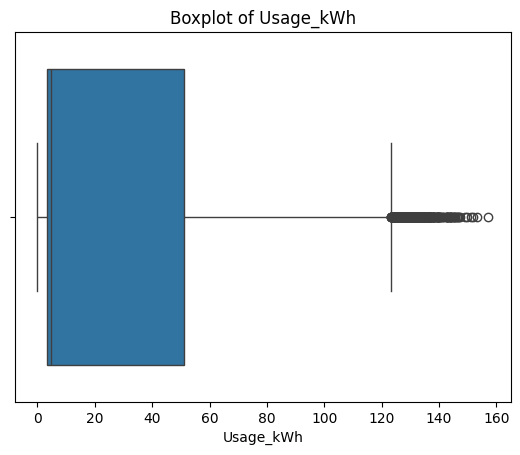

In [ ]:
sns.boxplot(x='Usage_kWh', data=df)
plt.title('Boxplot of Usage_kWh')
plt.show()

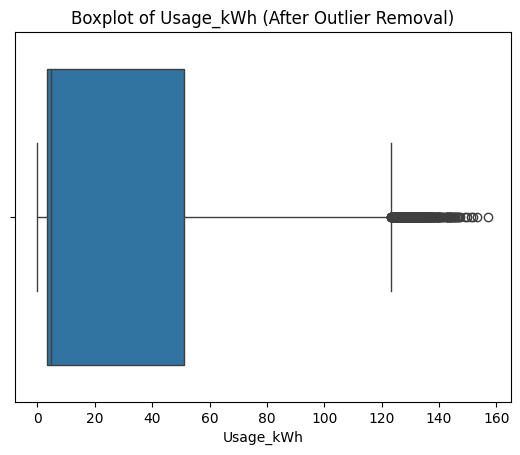

In [ ]:
sns.boxplot(x='Usage_kWh', data=df)
plt.title('Boxplot of Usage_kWh (After Outlier Removal)')
plt.show()

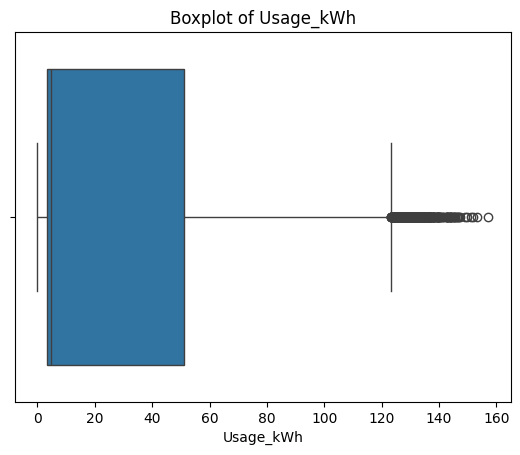

In [ ]:
sns.boxplot(x='Usage_kWh', data=df)
plt.title('Boxplot of Usage_kWh')
plt.show()

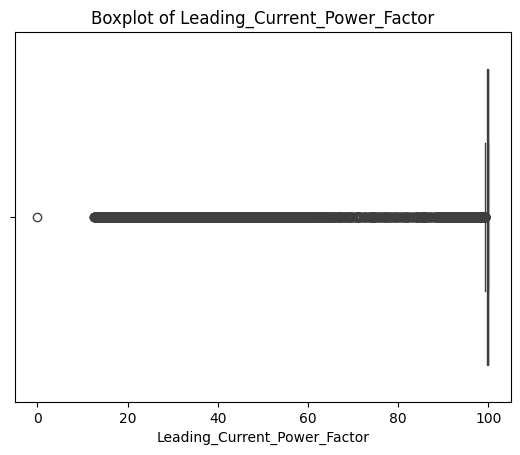

In [ ]:
sns.boxplot(x='Leading_Current_Power_Factor', data=df)
plt.title('Boxplot of Leading_Current_Power_Factor')
plt.show()

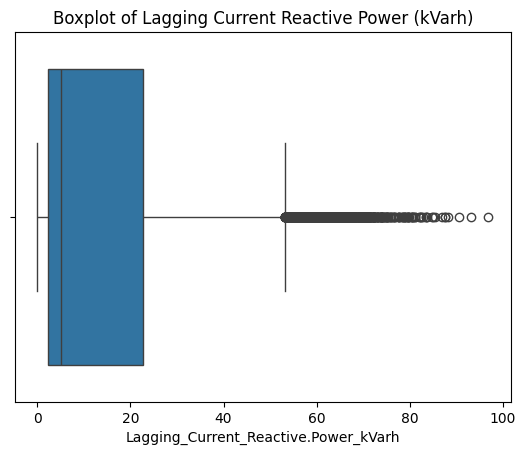

In [ ]:
sns.boxplot(x='Lagging_Current_Reactive.Power_kVarh', data=df)
plt.title('Boxplot of Lagging Current Reactive Power (kVarh)')
plt.show()

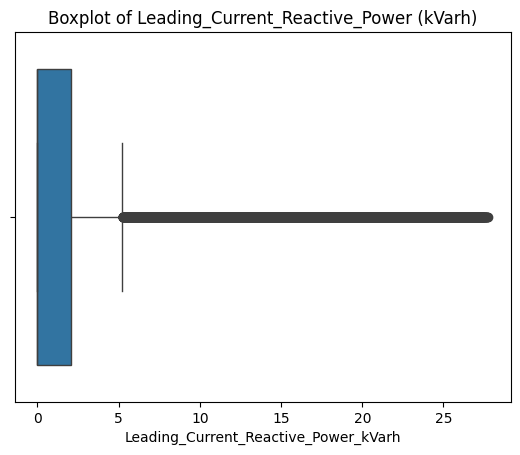

In [ ]:
sns.boxplot(x='Leading_Current_Reactive_Power_kVarh', data=df)
plt.title('Boxplot of Leading_Current_Reactive_Power (kVarh)')
plt.show()

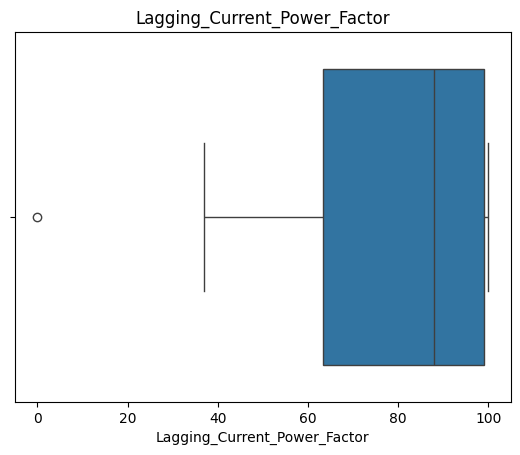

In [ ]:
sns.boxplot(x='Lagging_Current_Power_Factor', data=df)
plt.title('Lagging_Current_Power_Factor')
plt.show()

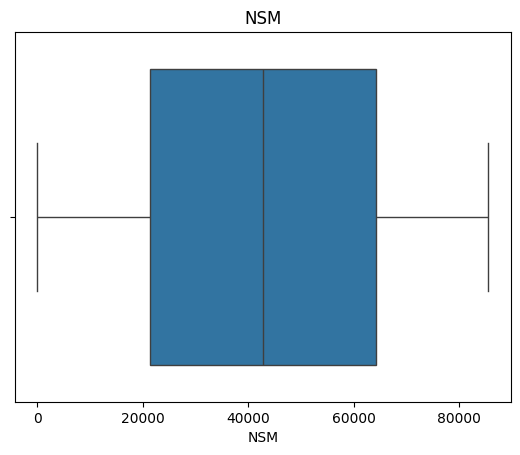

In [ ]:
sns.boxplot(x='NSM', data=df)
plt.title('NSM')
plt.show()

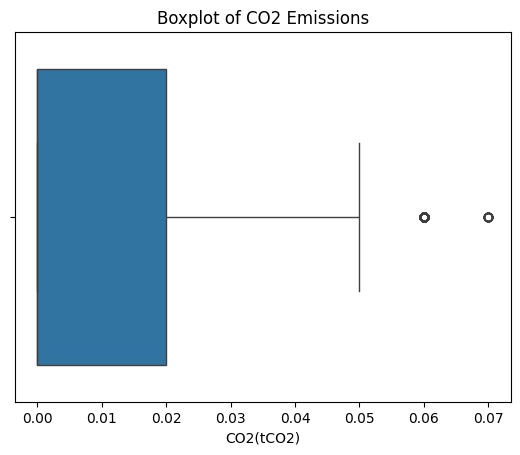

In [ ]:
sns.boxplot(x='CO2(tCO2)', data=df)
plt.title('Boxplot of CO2 Emissions')
plt.show()

IQR for Usage_kWh: 48.037499999999994


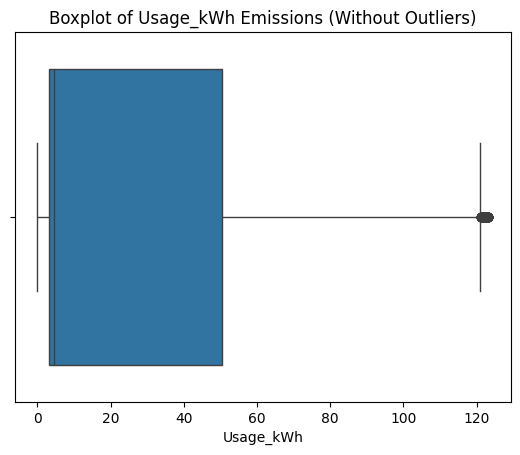

In [ ]:
q1 = df['Usage_kWh'].quantile(0.25)
q3 = df['Usage_kWh'].quantile(0.75)
iqr = q3 - q1
print("IQR for Usage_kWh:", iqr)
upperrange = q3 + 1.5 * iqr
bottomrange = q1 - 1.5 * iqr
df_clean = df[(df['Usage_kWh'] > bottomrange) & (df['Usage_kWh'] < upperrange)]
sns.boxplot(x='Usage_kWh', data=df_clean)
plt.title('Boxplot of Usage_kWh Emissions (Without Outliers)')
plt.show()

IQR for CO2(tCO2): 0.02


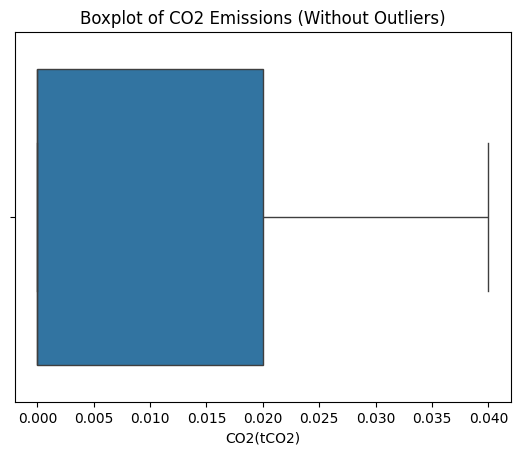

In [ ]:
q1 = df['CO2(tCO2)'].quantile(0.25)
q3 = df['CO2(tCO2)'].quantile(0.75)
iqr = q3 - q1
print("IQR for CO2(tCO2):", iqr)
upperrange = q3 + 1.5 * iqr
bottomrange = q1 - 1.5 * iqr
df_clean = df[(df['CO2(tCO2)'] > bottomrange) & (df['CO2(tCO2)'] < upperrange)]
sns.boxplot(x='CO2(tCO2)', data=df_clean)
plt.title('Boxplot of CO2 Emissions (Without Outliers)')
plt.show()

IQR for NSM: 42750.0


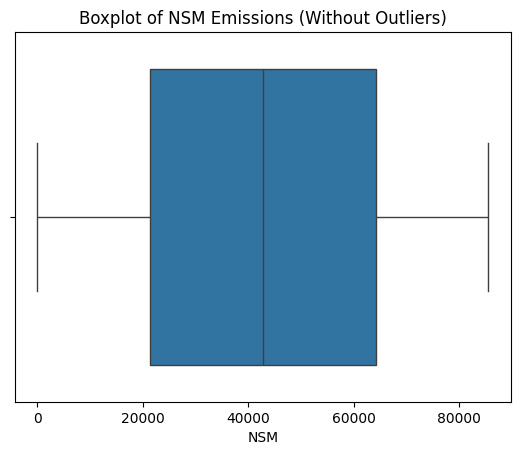

In [ ]:
q1 = df['NSM'].quantile(0.25)
q3 = df['NSM'].quantile(0.75)
iqr = q3 - q1
print("IQR for NSM:", iqr)
upperrange = q3 + 1.5 * iqr
bottomrange = q1 - 1.5 * iqr
df_clean = df[(df['NSM'] > bottomrange) & (df['NSM'] < upperrange)]
sns.boxplot(x='NSM', data=df_clean)
plt.title('Boxplot of NSM Emissions (Without Outliers)')
plt.show()

IQR for Lagging_Current_Power_Factor: 35.70249999999999


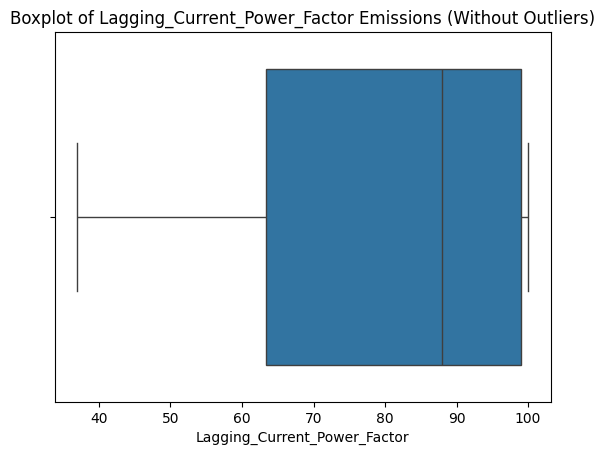

In [ ]:
q1 = df['Lagging_Current_Power_Factor'].quantile(0.25)
q3 = df['Lagging_Current_Power_Factor'].quantile(0.75)
iqr = q3 - q1
print("IQR for Lagging_Current_Power_Factor:", iqr)
upperrange = q3 + 1.5 * iqr
bottomrange = q1 - 1.5 * iqr
df_clean = df[(df['Lagging_Current_Power_Factor'] > bottomrange) & (df['Lagging_Current_Power_Factor'] < upperrange)]
sns.boxplot(x='Lagging_Current_Power_Factor', data=df_clean)
plt.title('Boxplot of Lagging_Current_Power_Factor Emissions (Without Outliers)')
plt.show()

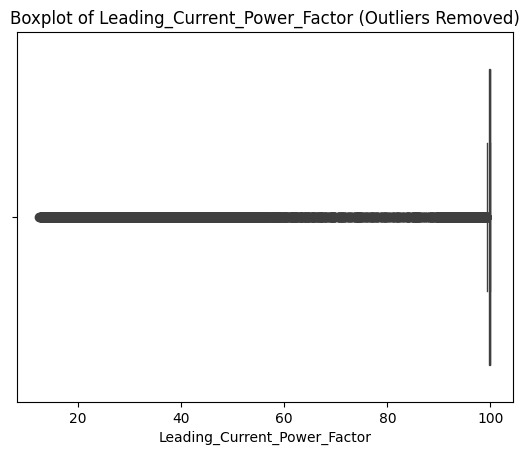

In [ ]:
q1 = df['Leading_Current_Power_Factor'].quantile(0.25)
q3 = df['Leading_Current_Power_Factor'].quantile(0.75)
iqr = q3 - q1
lower_range = q1 - 1.5 * iqr
upper_range = q3 + 1.5 * iqr
df_clean = df[(df['Leading_Current_Power_Factor'] >= bottomrange) & (df['Leading_Current_Power_Factor'] <= upperrange)]
sns.boxplot(x='Leading_Current_Power_Factor', data=df_clean)
plt.title('Boxplot of Leading_Current_Power_Factor (Outliers Removed)')
plt.show()

In [ ]:
q3 = df['Usage_kWh'].quantile(0.75)
q1 = df['Usage_kWh'].quantile(0.25)
iqr = q3 - q1
print("IQR for Usage_kWh:", iqr)

IQR for Usage_kWh: 48.037499999999994


In [ ]:
q3 = df['CO2(tCO2)'].quantile(0.75)
q1 = df['CO2(tCO2)'].quantile(0.25)
iqr = q3 - q1
print("IQR for CO2(tCO2):", iqr)

IQR for CO2(tCO2): 0.02


In [ ]:
q3 = df['NSM'].quantile(0.75)
q1 = df['NSM'].quantile(0.25)
iqr = q3 - q1
print("IQR for NSM:", iqr)

IQR for NSM: 42750.0


In [ ]:
q3 = df['Lagging_Current_Reactive.Power_kVarh'].quantile(0.75)
q1 = df['Lagging_Current_Reactive.Power_kVarh'].quantile(0.25)
iqr = q3 - q1
print("IQR for Lagging_Current_Reactive.Power_kVarh:", iqr)

IQR for Lagging_Current_Reactive.Power_kVarh: 20.34


In [ ]:
q3 = df['Leading_Current_Reactive_Power_kVarh'].quantile(0.75)
q1 = df['Leading_Current_Reactive_Power_kVarh'].quantile(0.25)
iqr = q3 - q1
print("IQR for Leading_Current_Reactive_Power_kVarh:", iqr)

IQR for Leading_Current_Reactive_Power_kVarh: 2.09


In [ ]:
q3 = df['Lagging_Current_Power_Factor'].quantile(0.75)
q1 = df['Lagging_Current_Power_Factor'].quantile(0.25)
iqr = q3 - q1
print("IQR for Lagging_Current_Power_Factor:", iqr)

IQR for Lagging_Current_Power_Factor: 35.70249999999999


In [ ]:
q3 = df['Leading_Current_Power_Factor'].quantile(0.75)
q1 = df['Leading_Current_Power_Factor'].quantile(0.25)
iqr = q3 - q1
print("IQR for Leading_Current_Power_Factor:", iqr)

IQR for Leading_Current_Power_Factor: 0.29999999999999716


In [ ]:
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.00,0.0,73.21,100.00,900,1,0,0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,0,0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,0,0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,0,0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,0,0
...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,0,0
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,0,0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,0,0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,1,0,0


<Axes: >

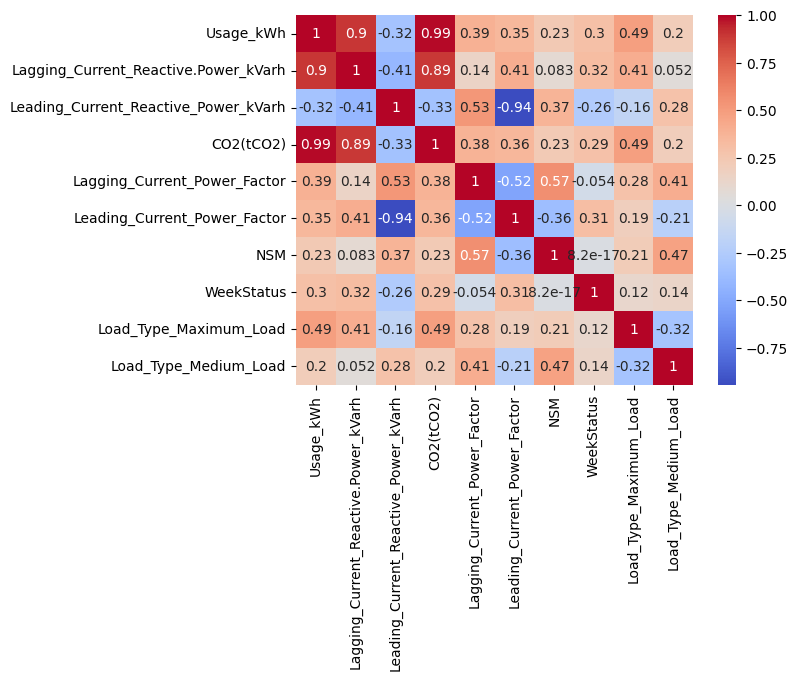

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [ ]:
correlation = df.corr(numeric_only=True)['CO2(tCO2)'].sort_values(ascending=False)
print("Correlation with CO2(tCO2):")
print(correlation)

Correlation with CO2(tCO2):
CO2(tCO2)                               1.000000
Usage_kWh                               0.988180
Lagging_Current_Reactive.Power_kVarh    0.886948
Load_Type_Maximum_Load                  0.487165
Lagging_Current_Power_Factor            0.379605
Leading_Current_Power_Factor            0.360019
WeekStatus                              0.290467
NSM                                     0.231726
Load_Type_Medium_Load                   0.198719
Leading_Current_Reactive_Power_kVarh   -0.332777
Name: CO2(tCO2), dtype: float64


In [ ]:
correlation = df.corr(numeric_only=True)['CO2(tCO2)'].sort_values(ascending=False)
top_features = correlation[correlation > 0.3].index.tolist()
print("Top positively correlated features with CO2(tCO2):")
print(top_features)

Top positively correlated features with CO2(tCO2):
['CO2(tCO2)', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Load_Type_Maximum_Load', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']


In [ ]:
correlation = df.corr(numeric_only=True)['Usage_kWh'].sort_values(ascending=False)
top_features = correlation[correlation > 0.3].index.tolist()
print("Top positively correlated features with Usage_kWh:")
print(top_features)

Top positively correlated features with Usage_kWh:
['Usage_kWh', 'CO2(tCO2)', 'Lagging_Current_Reactive.Power_kVarh', 'Load_Type_Maximum_Load', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']


In [ ]:
correlation = df.corr(numeric_only=True)['NSM'].sort_values(ascending=False)
top_features = correlation[correlation > 0.3].index.tolist()
print("Top positively correlated features with NSM:")
print(top_features)

Top positively correlated features with NSM:
['NSM', 'Lagging_Current_Power_Factor', 'Load_Type_Medium_Load', 'Leading_Current_Reactive_Power_kVarh']


In [ ]:
correlation = df.corr(numeric_only=True)['Lagging_Current_Power_Factor'].sort_values(ascending=False)
top_features = correlation[correlation > 0.3].index.tolist()
print("Top positively correlated features with 'Lagging_Current_Power_Factor:")
print(top_features)

Top positively correlated features with 'Lagging_Current_Power_Factor:
['Lagging_Current_Power_Factor', 'NSM', 'Leading_Current_Reactive_Power_kVarh', 'Load_Type_Medium_Load', 'Usage_kWh', 'CO2(tCO2)']


In [ ]:
#To view all numeric columns
print(df.select_dtypes(include=['float64', 'int64']).columns)

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Load_Type_Maximum_Load', 'Load_Type_Medium_Load'],
      dtype='object')


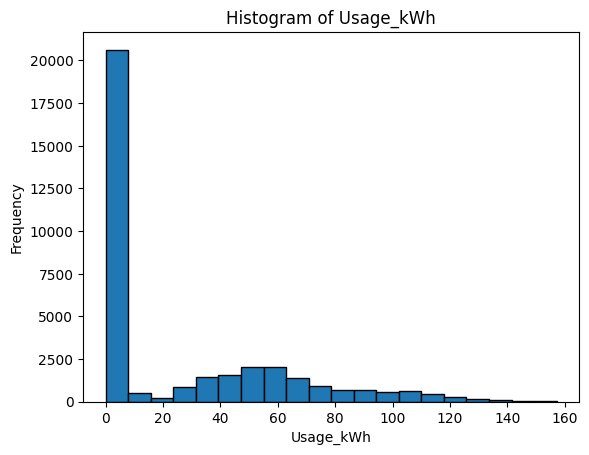

In [ ]:
# Histogram
plt.hist(df['Usage_kWh'], bins=20, edgecolor='black')
plt.xlabel('Usage_kWh')
plt.ylabel('Frequency')
plt.title('Histogram of Usage_kWh')
plt.show()

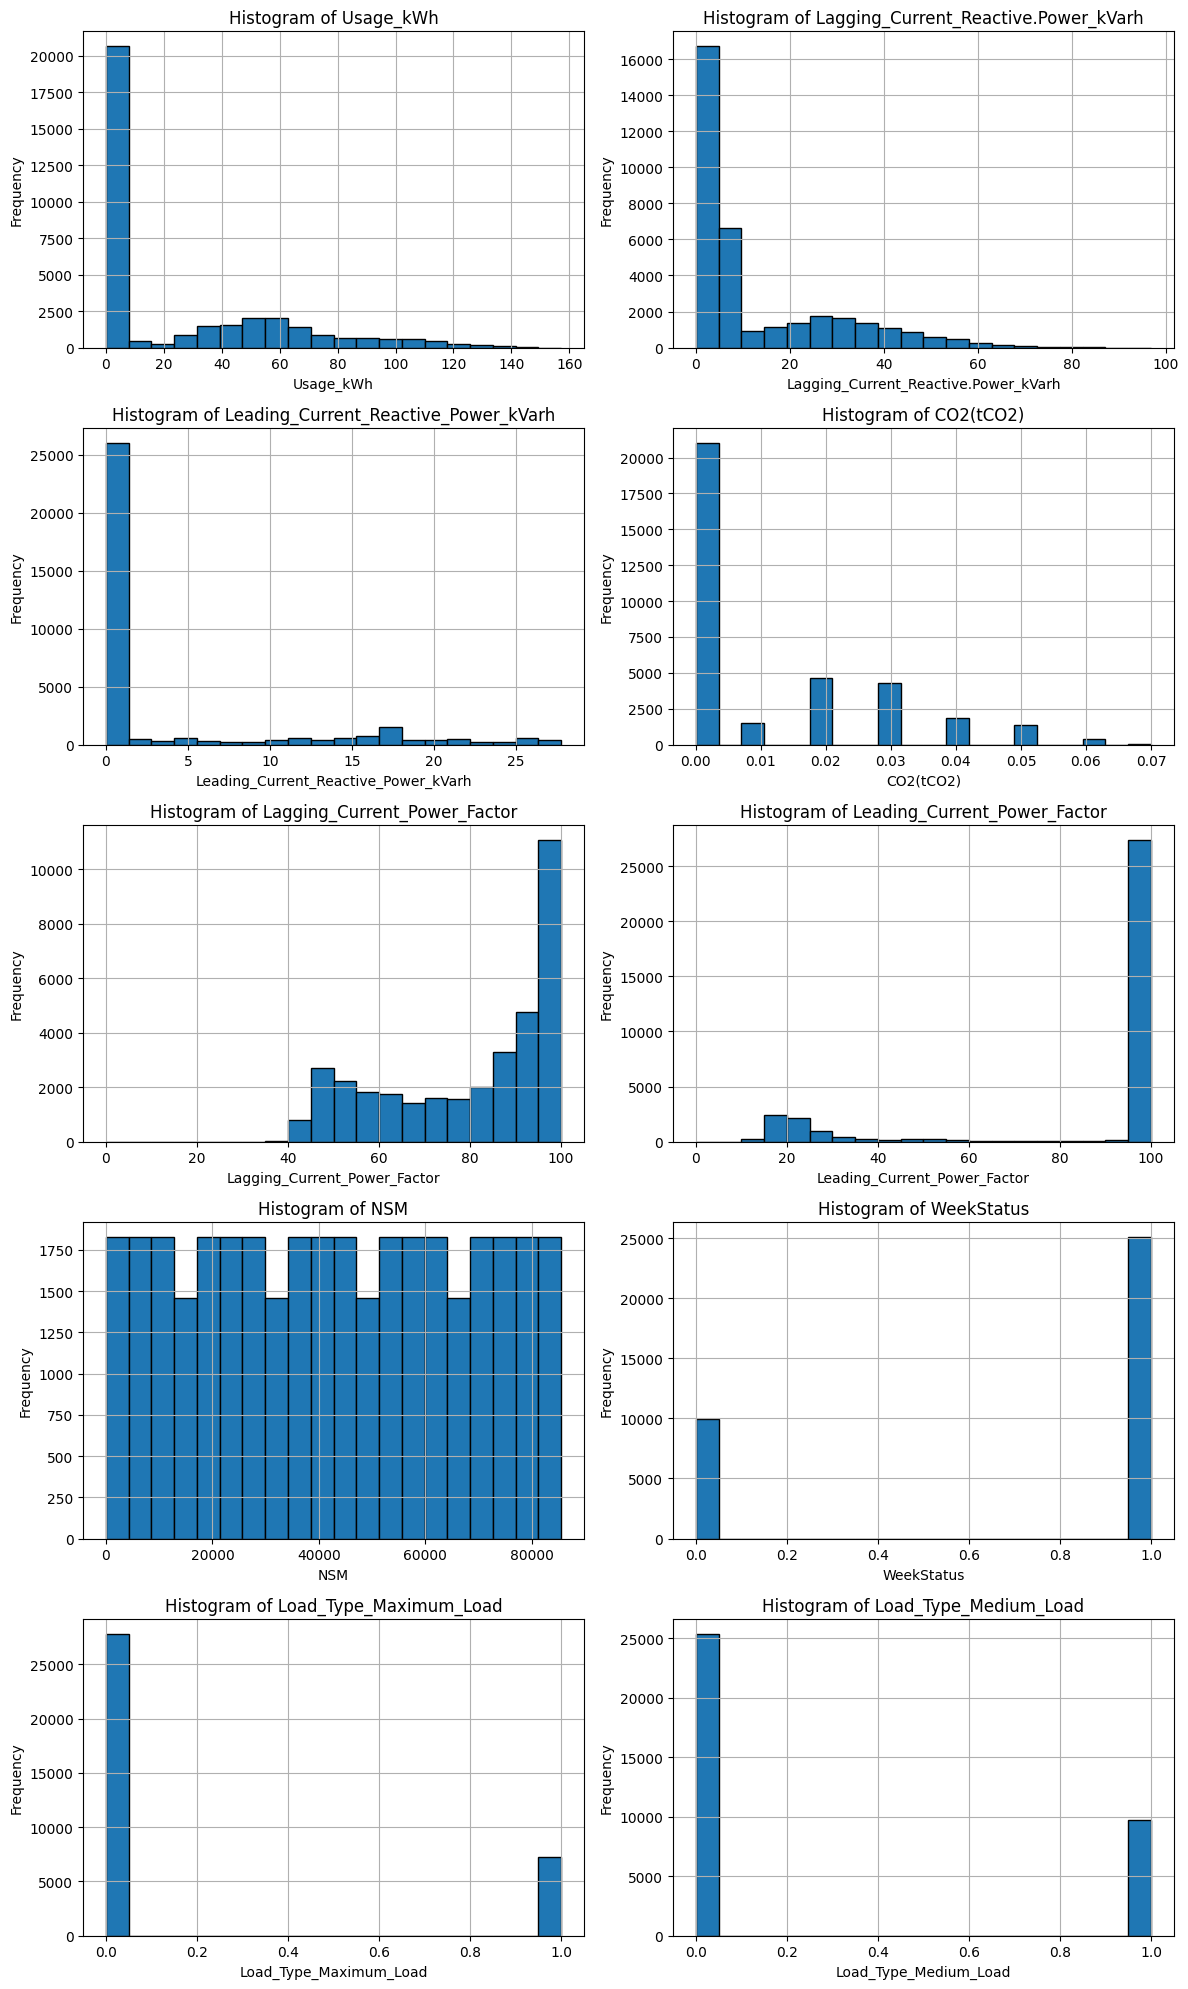

In [ ]:
# Select only numeric columns for plotting
numeric_columns = df.select_dtypes(include=['number']).columns
num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2
# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4))  # Adjust size based on number of rows
axes = axes.flatten()
# Plot histograms
for i, column in enumerate(numeric_columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')  # You can adjust bins if needed
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")
# Remove empty subplot if odd number of columns
if num_columns % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

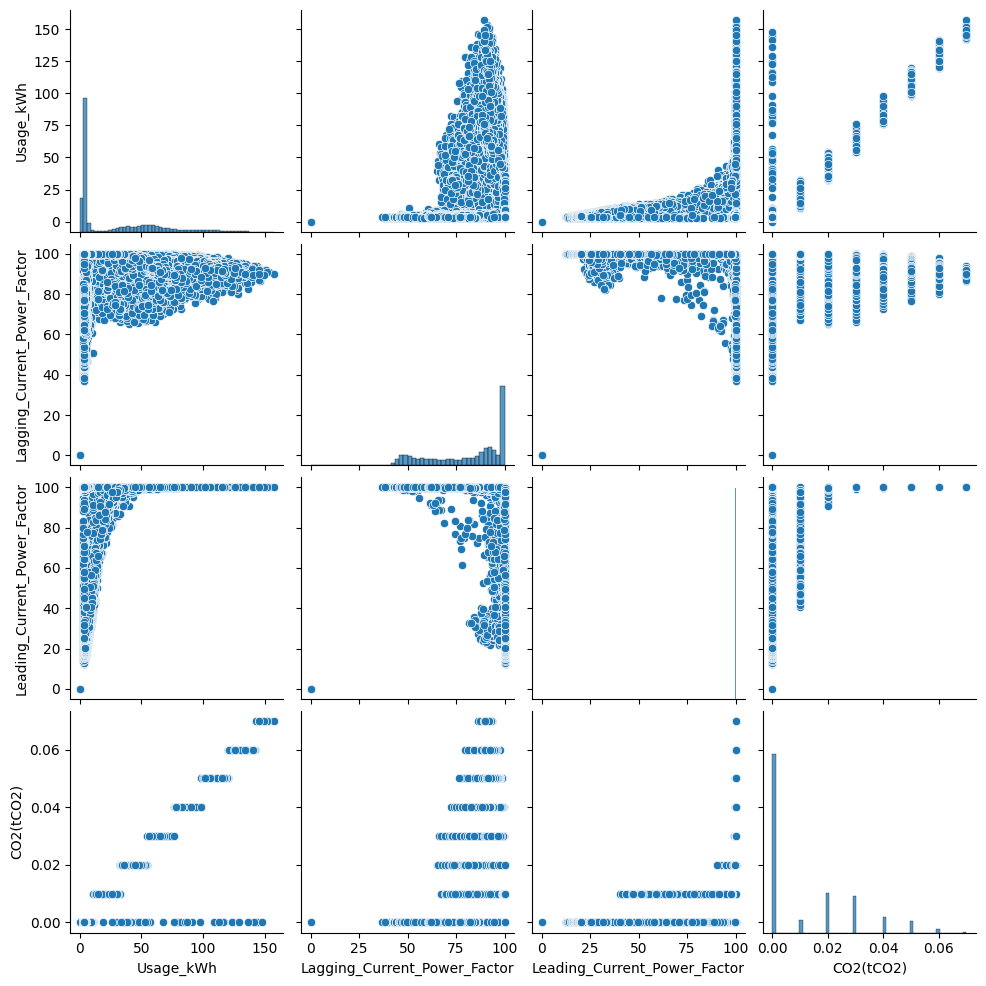

In [ ]:
# Select numeric columns for pairplot
selected_cols = ['Usage_kWh', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'CO2(tCO2)']

# Plot pairwise relationships
sns.pairplot(df[selected_cols])
plt.show()

In [ ]:
# Automatically detect categorical columns (object/string type)
cat_columns = df.select_dtypes(include='object').columns.tolist()

if len(cat_columns) == 0:
    print("No categorical columns found in dataset.")
else:
    num_cols = len(cat_columns)
    num_rows = (num_cols + 1) // 2  # Arrange in 2 columns

    fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(cat_columns):
        sns.countplot(x=col, data=df, ax=axes[i], palette='viridis')
        axes[i].set_title(f"Count Plot for {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")

    # Remove empty subplot if odd number of columns
    if num_cols % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

No categorical columns found in dataset.


In [ ]:
print(df.select_dtypes(include='object').columns)

Index([], dtype='object')


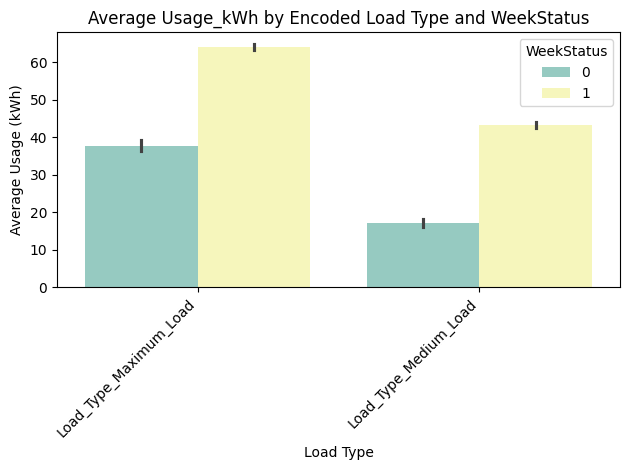

In [ ]:
if 'WeekStatus' in df.columns:
    # Melt the DataFrame to have load types as a single column
    df_melted = df.melt(id_vars=['Usage_kWh', 'WeekStatus'],
                       value_vars=['Load_Type_Maximum_Load', 'Load_Type_Medium_Load'],
                       var_name='Load_Type_Encoded', value_name='Value')

    # Filter for rows where the encoded load type is active (Value == 1)
    df_filtered = df_melted[df_melted['Value'] == 1]

    sns.barplot(x='Load_Type_Encoded', y='Usage_kWh', hue='WeekStatus', data=df_filtered, estimator='mean', palette='Set3')
    plt.title('Average Usage_kWh by Encoded Load Type and WeekStatus')
    plt.xlabel('Load Type')
    plt.ylabel('Average Usage (kWh)')
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability
    plt.tight_layout()
    plt.show()
else:
    print("Column 'WeekStatus' not found in dataset. Please choose a different column for hue.")

In [ ]:
if 'Load_Type' in df.columns:
    sns.barplot(x='Load_Type', y='Usage_kWh', hue='Load_Type', data=df, estimator='mean', palette='Set3')
    plt.title('Average Usage_kWh by Load Type and Load_Type')
    plt.xlabel('Load Type')
    plt.ylabel('Average Usage (kWh)')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Load_Type' not found in dataset. Please choose a different column for hue.")

Column 'Load_Type' not found in dataset. Please choose a different column for hue.


In [ ]:
df.corr(numeric_only=True)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type_Maximum_Load,Load_Type_Medium_Load
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,2.346103e-01,2.954748e-01,0.487792,0.204521
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,8.266237e-02,3.198698e-01,0.412859,0.052157
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,3.716046e-01,-2.604306e-01,-0.155255,0.284623
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,2.317260e-01,2.904670e-01,0.487165,0.198719
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,5.652695e-01,-5.408210e-02,0.282239,0.408192
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-3.605630e-01,3.146749e-01,0.190842,-0.212413
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000e+00,8.249137e-17,0.211061,0.472706
WeekStatus,0.295475,0.319870,-0.260431,0.290467,-0.054082,0.314675,8.249137e-17,1.000000e+00,0.117243,0.141707
Load_Type_Maximum_Load,0.487792,0.412859,-0.155255,0.487165,0.282239,0.190842,2.110607e-01,1.172431e-01,1.000000,-0.316529
Load_Type_Medium_Load,0.204521,0.052157,0.284623,0.198719,0.408192,-0.212413,4.727060e-01,1.417070e-01,-0.316529,1.000000


In [ ]:
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.00,0.0,73.21,100.00,900,1,0,0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,0,0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,0,0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,0,0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,0,0
...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,0,0
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,0,0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,0,0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,1,0,0


array([[<Axes: title={'center': 'Usage_kWh'}>,
        <Axes: title={'center': 'Lagging_Current_Reactive.Power_kVarh'}>,
        <Axes: title={'center': 'Leading_Current_Reactive_Power_kVarh'}>],
       [<Axes: title={'center': 'CO2(tCO2)'}>,
        <Axes: title={'center': 'Lagging_Current_Power_Factor'}>,
        <Axes: title={'center': 'Leading_Current_Power_Factor'}>],
       [<Axes: title={'center': 'NSM'}>,
        <Axes: title={'center': 'WeekStatus'}>,
        <Axes: title={'center': 'Load_Type_Maximum_Load'}>],
       [<Axes: title={'center': 'Load_Type_Medium_Load'}>, <Axes: >,
        <Axes: >]], dtype=object)

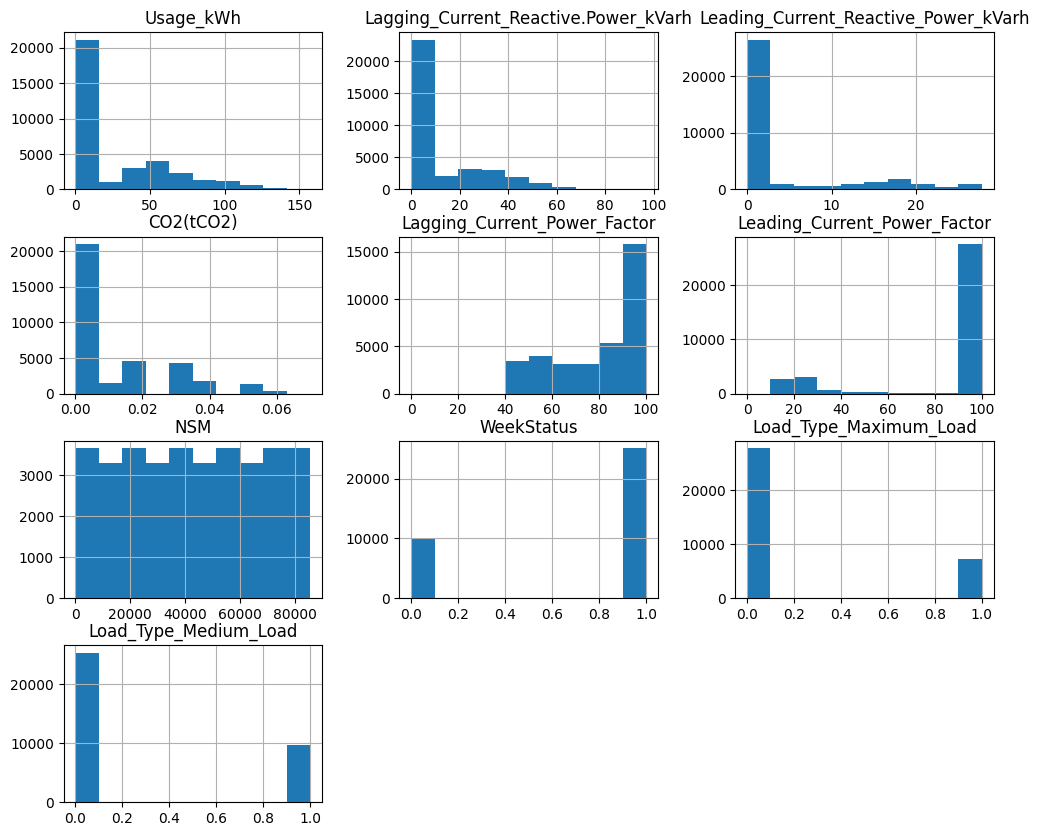

In [ ]:
#Numeric columns:Histograms
df.hist(figsize=(12, 10))

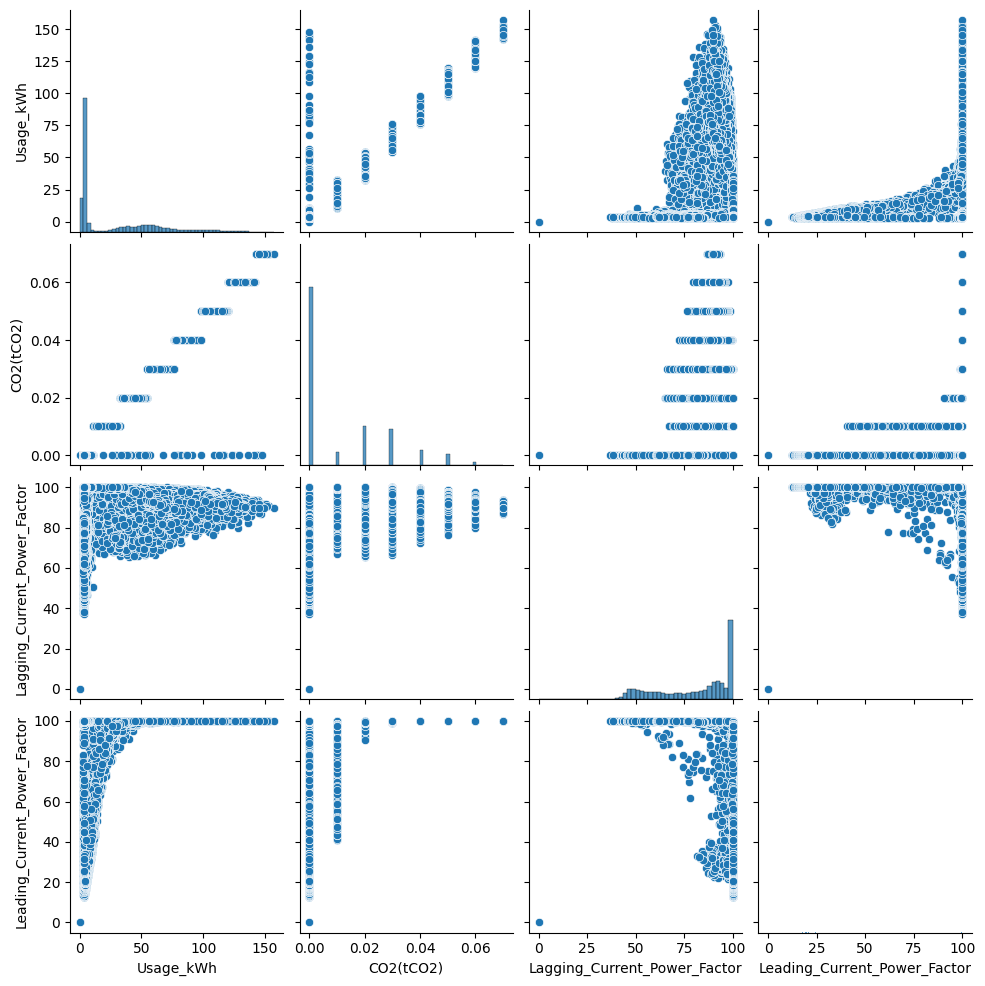

In [ ]:
#Multivariate Analysis :Pairplot (for key numerical columns)

sns.pairplot(df[['Usage_kWh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']])

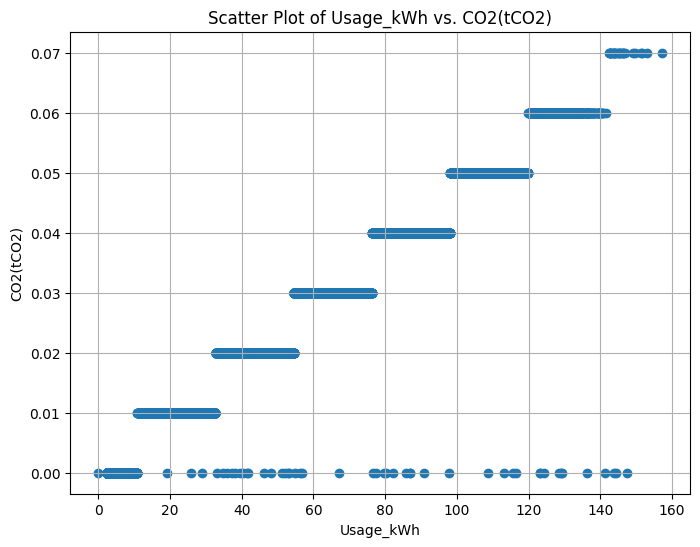

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Usage_kWh'], df['CO2(tCO2)'])
plt.xlabel('Usage_kWh')
plt.ylabel('CO2(tCO2)')
plt.title('Scatter Plot of Usage_kWh vs. CO2(tCO2)')
plt.grid(True)
plt.show()

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['Usage_kWh'])
y = df['Usage_kWh']

print("Shape of features:", X.shape)
print("Shape of target:", y.shape)


Shape of features: (35040, 9)
Shape of target: (35040,)


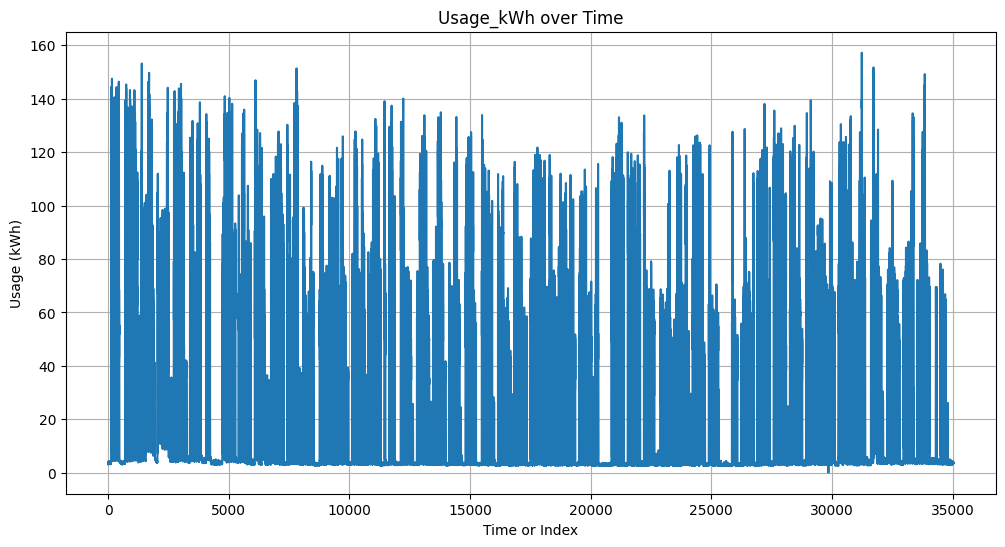

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Usage_kWh'])
plt.xlabel('Time or Index')
plt.ylabel('Usage (kWh)')
plt.title('Usage_kWh over Time')
plt.grid(True)
plt.show()

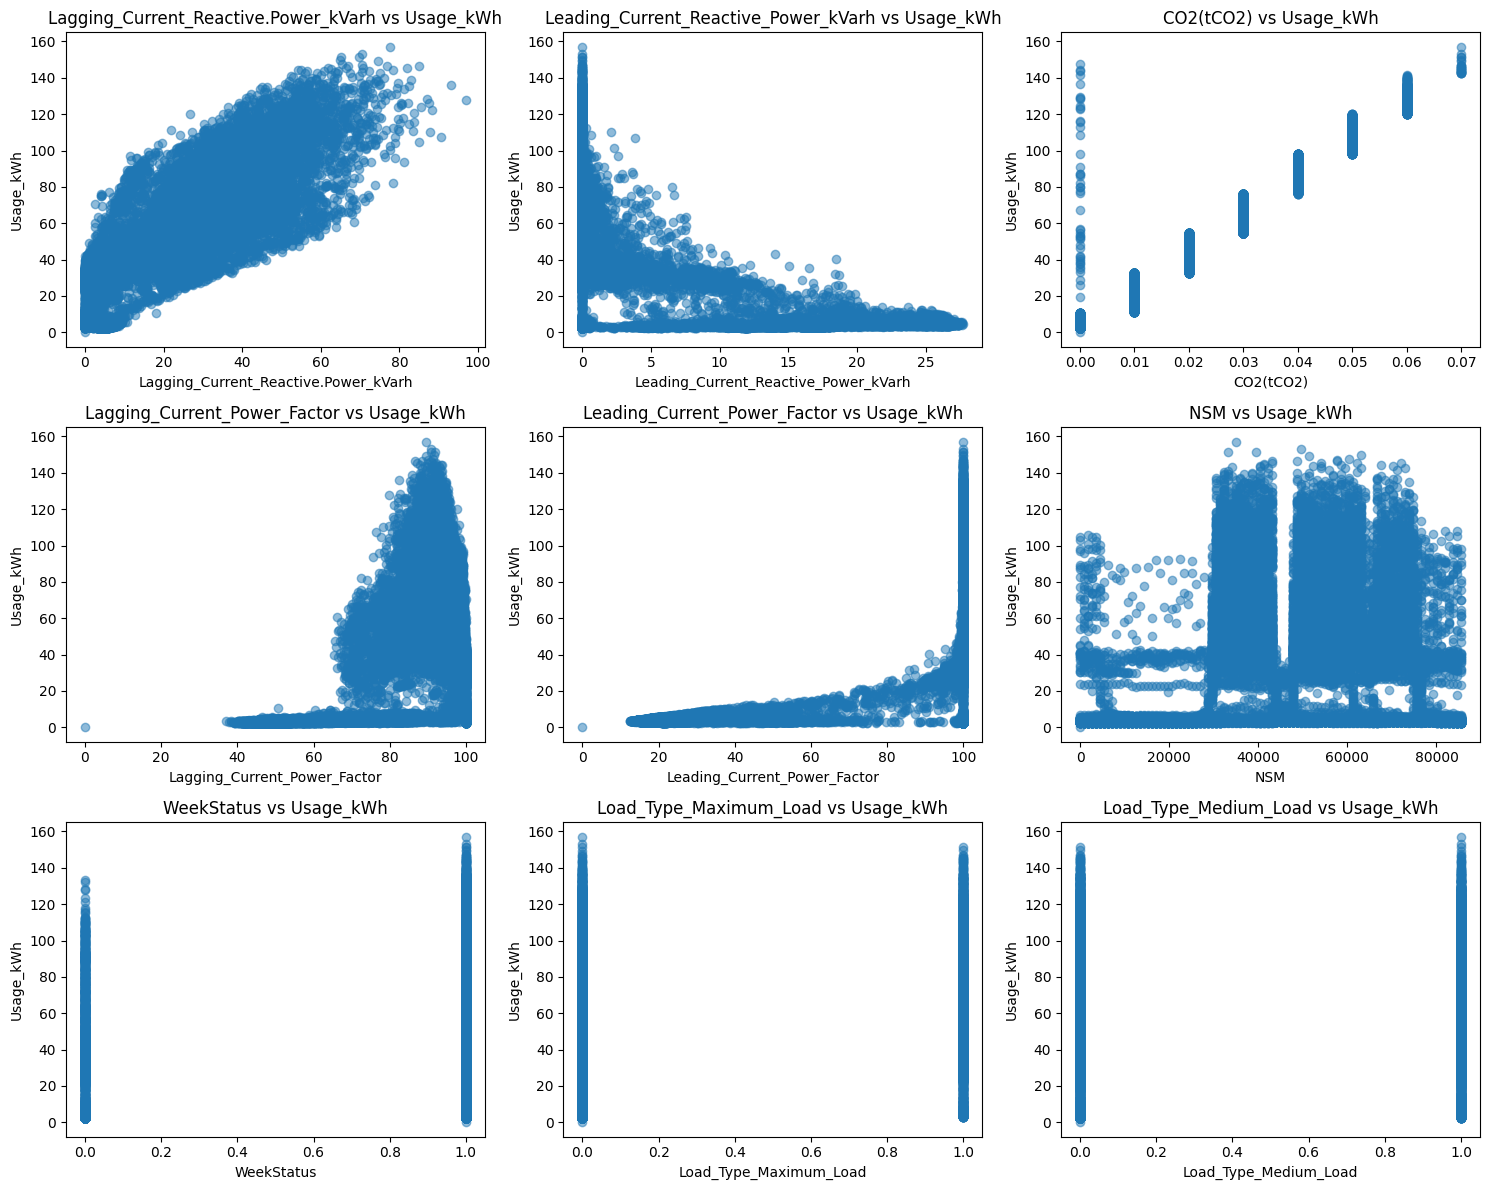

In [ ]:
# Define features and target
features = X.columns
target = 'Usage_kWh'

# Number of columns for subplot layout
num_cols = 3
num_features = len(features)
num_rows = -(-num_features // num_cols)  # ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*4))
axes = axes.flatten()

# Plot scatter plots of each feature vs target
for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df[target], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'{feature} vs {target}')

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Define the target variable (y) and the feature variables (X).
X = df.drop(['Usage_kWh'], axis=1)
y = df['Usage_kWh']

In [ ]:
X

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,2.95,0.00,0.0,73.21,100.00,900,1,0,0
1,4.46,0.00,0.0,66.77,100.00,1800,1,0,0
2,3.28,0.00,0.0,70.28,100.00,2700,1,0,0
3,3.56,0.00,0.0,68.09,100.00,3600,1,0,0
4,4.50,0.00,0.0,64.72,100.00,4500,1,0,0
...,...,...,...,...,...,...,...,...,...
35035,4.86,0.00,0.0,62.10,100.00,82800,1,0,0
35036,3.74,0.00,0.0,70.71,100.00,83700,1,0,0
35037,3.17,0.07,0.0,76.62,99.98,84600,1,0,0
35038,3.06,0.11,0.0,77.72,99.96,85500,1,0,0


In [ ]:
y

,Usage_kWh
0,3.17
1,4.00
2,3.24
3,3.31
4,3.82
...,...
35035,3.85
35036,3.74
35037,3.78
35038,3.78


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type_Maximum_Load,Load_Type_Medium_Load
24510,5.26,0.00,0.00,56.48,100.00,27900,1,0,0
11355,3.74,0.00,0.00,57.52,100.00,25200,0,0,0
32539,4.21,0.00,0.00,68.88,100.00,82800,1,1,0
18663,1.66,0.29,0.02,99.91,100.00,36000,0,0,1
33094,0.00,3.89,0.01,100.00,99.27,63900,1,1,0
...,...,...,...,...,...,...,...,...,...
16850,0.00,25.27,0.00,100.00,22.22,45900,1,0,1
6265,4.57,0.00,0.00,63.03,100.00,23400,1,0,0
11284,0.14,14.33,0.01,99.99,68.76,47700,0,1,0
860,4.32,0.00,0.00,73.19,100.00,83700,1,0,0


In [ ]:
model = LinearRegression()

In [ ]:
model.fit( X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([  2.94088764,  70.36183469, 124.56009323, ...,   1.6437145 ,
         1.69201358,   4.10168261])

In [ ]:
linear = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
linear

,Predicted,Actual
11356,2.940888,2.88
26543,70.361835,60.77
2445,124.560093,120.42
14649,2.698503,3.13
32699,63.662094,58.86
...,...,...
11149,3.615294,3.06
11558,2.709831,3.17
27673,1.643714,3.06
20857,1.692014,2.59


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
r2_score(y_test,y_pred)

0.984148072036645

In [ ]:
mean_absolute_error(y_test,y_pred)

2.545571100215785

In [ ]:
mean_squared_error(y_test,y_pred)

17.79193845001969

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.17475813075977556

In [ ]:
model.coef_

array([ 3.41633065e-01,  6.69003714e-02,  1.62671521e+03,  1.27218740e-01,
        6.18258082e-02, -2.84480964e-06, -5.17227265e-02,  1.29666397e+00,
        1.86083838e+00])

In [ ]:
model.intercept_

np.float64(-12.131050104430287)

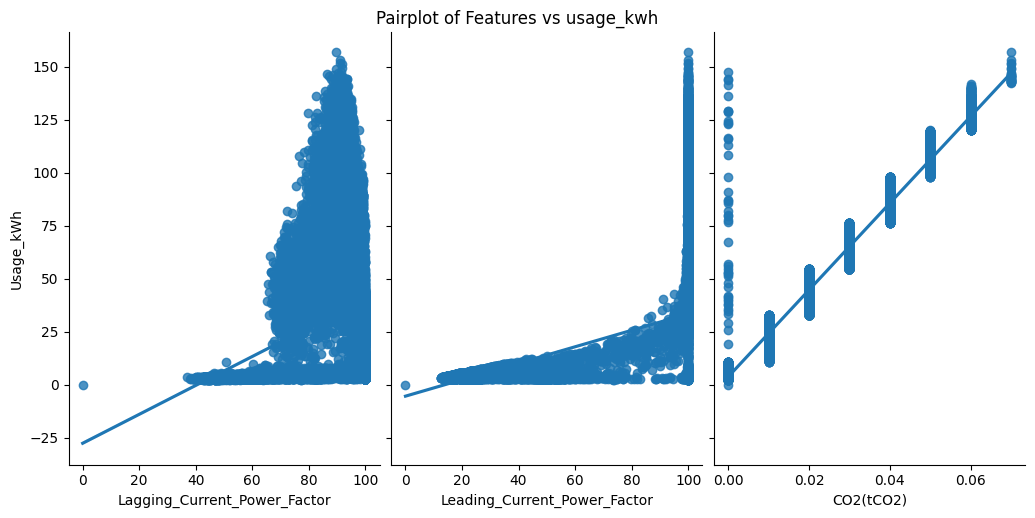

In [ ]:
selected_features = ['Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'CO2(tCO2)']

# Plot scatterplots with regression lines
sns.pairplot(df, x_vars=selected_features, y_vars='Usage_kWh', height=5, aspect=0.7, kind='reg')

plt.suptitle("Pairplot of Features vs usage_kwh", y=1.02)
plt.show()

In [ ]:
df.columns


Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Load_Type_Maximum_Load', 'Load_Type_Medium_Load'],
      dtype='object')

# ***KNN***

In [ ]:
%matplotlib inline

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model=KNeighborsRegressor(n_neighbors=5)

In [ ]:
model.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([  3.162,  64.204, 120.406, ...,   2.872,   2.628,   3.888])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

,Predicted,Actual
11356,3.162,2.88
26543,64.204,60.77
2445,120.406,120.42
14649,3.124,3.13
32699,57.160,58.86
...,...,...
11149,3.426,3.06
11558,3.154,3.17
27673,2.872,3.06
20857,2.628,2.59


In [ ]:
from sklearn import metrics

In [ ]:
r2_score(y_test,y_pred)

0.982429868792844

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

1.8627003424657533

In [ ]:
mean_squared_error(y_test,y_pred)

19.720420993531203

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(4.440768063469562)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.06895680201769448


6.895680201769448

In [ ]:
X_test

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type_Maximum_Load,Load_Type_Medium_Load
11356,3.82,0.00,0.00,60.20,100.00,26100,0,0,0
26543,48.02,0.00,0.03,78.46,100.00,43200,1,1,0
2445,59.65,0.00,0.06,89.61,100.00,41400,1,1,0
14649,0.00,16.60,0.00,100.00,18.53,52200,0,0,0
32699,20.99,0.00,0.03,94.19,100.00,54000,1,0,1
...,...,...,...,...,...,...,...,...,...
11149,3.42,0.00,0.00,66.68,100.00,12600,1,0,0
11558,0.00,16.88,0.00,100.00,18.46,35100,1,0,0
27673,6.30,0.00,0.00,43.69,100.00,23400,1,0,0
20857,4.68,0.00,0.00,48.42,100.00,23400,1,0,0


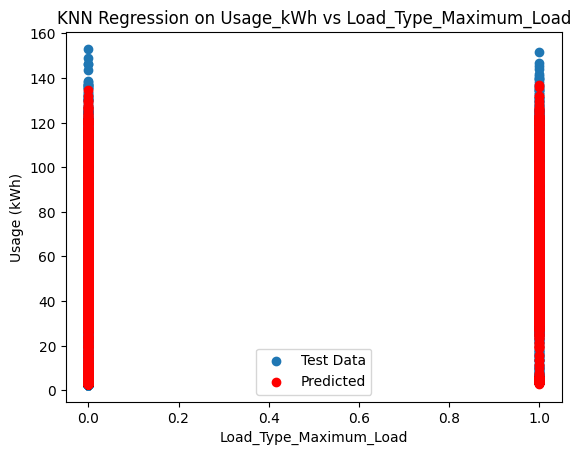

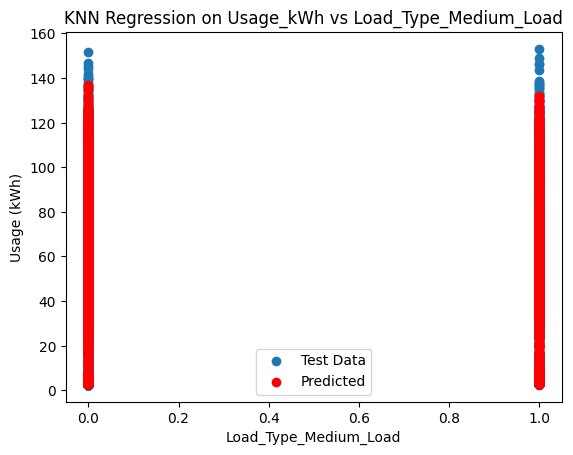

In [ ]:
for col in X_test.columns:
    if 'Load_Type' in col:   # only dummy columns of Load_Type
        plt.scatter(X_test[col], y_test, label='Test Data')
        plt.scatter(X_test[col], y_pred, color='red', linewidth=1, label='Predicted')
        plt.xlabel(col)
        plt.ylabel('Usage (kWh)')
        plt.title(f'KNN Regression on Usage_kWh vs {col}')
        plt.legend()
        plt.show()

# ***SVM***

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='poly')

In [ ]:
model.fit(X_train,y_train)

SVR(kernel='poly')

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([4.21903725, 4.42366132, 4.40255236, ..., 4.20095306, 4.20131396,
       4.15216073])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
svm

,Predicted,Actual
11356,4.219037,2.88
26543,4.423661,60.77
2445,4.402552,120.42
14649,4.500175,3.13
32699,4.634898,58.86
...,...,...
11149,4.161775,3.06
11558,4.266760,3.17
27673,4.200953,3.06
20857,4.201314,2.59


In [ ]:
r2_score(y_test,y_pred)

-0.4711131763777665

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

24.275628373657938

In [ ]:
mean_squared_error(y_test,y_pred)

1651.152790224175

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(40.634379412317536)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.5809019174569157


58.09019174569157

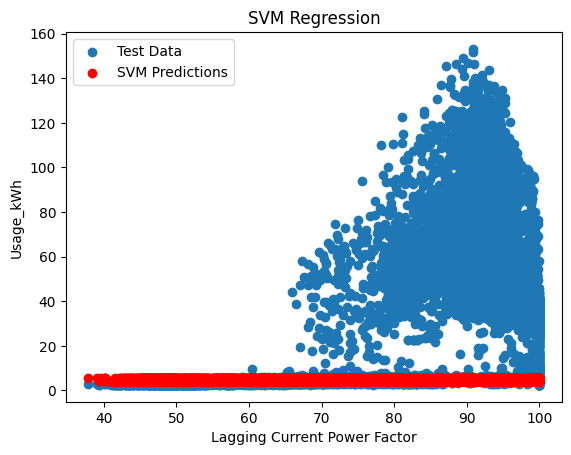

In [ ]:
plt.scatter(X_test['Lagging_Current_Power_Factor'], y_test, label='Test Data')
plt.scatter(X_test['Lagging_Current_Power_Factor'], y_pred, color='red', linewidth=1, label='SVM Predictions')
plt.xlabel('Lagging Current Power Factor')
plt.ylabel('Usage_kWh')
plt.title('SVM Regression')
plt.legend()
plt.show()

# ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([  2.88,  61.42, 120.2 , ...,   3.06,   2.59,   4.36])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
11356,2.88,2.88
26543,61.42,60.77
2445,120.20,120.42
14649,3.13,3.13
32699,58.28,58.86
...,...,...
11149,3.06,3.06
11558,3.17,3.17
27673,3.06,3.06
20857,2.59,2.59


In [ ]:
r2_score(y_test,y_pred)

0.9978033085944367

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.530591704718417

In [ ]:
mean_squared_error(y_test,y_pred)

2.465529642313546

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.018247533124430112


1.824753312443011

In [ ]:
from sklearn.tree import plot_tree

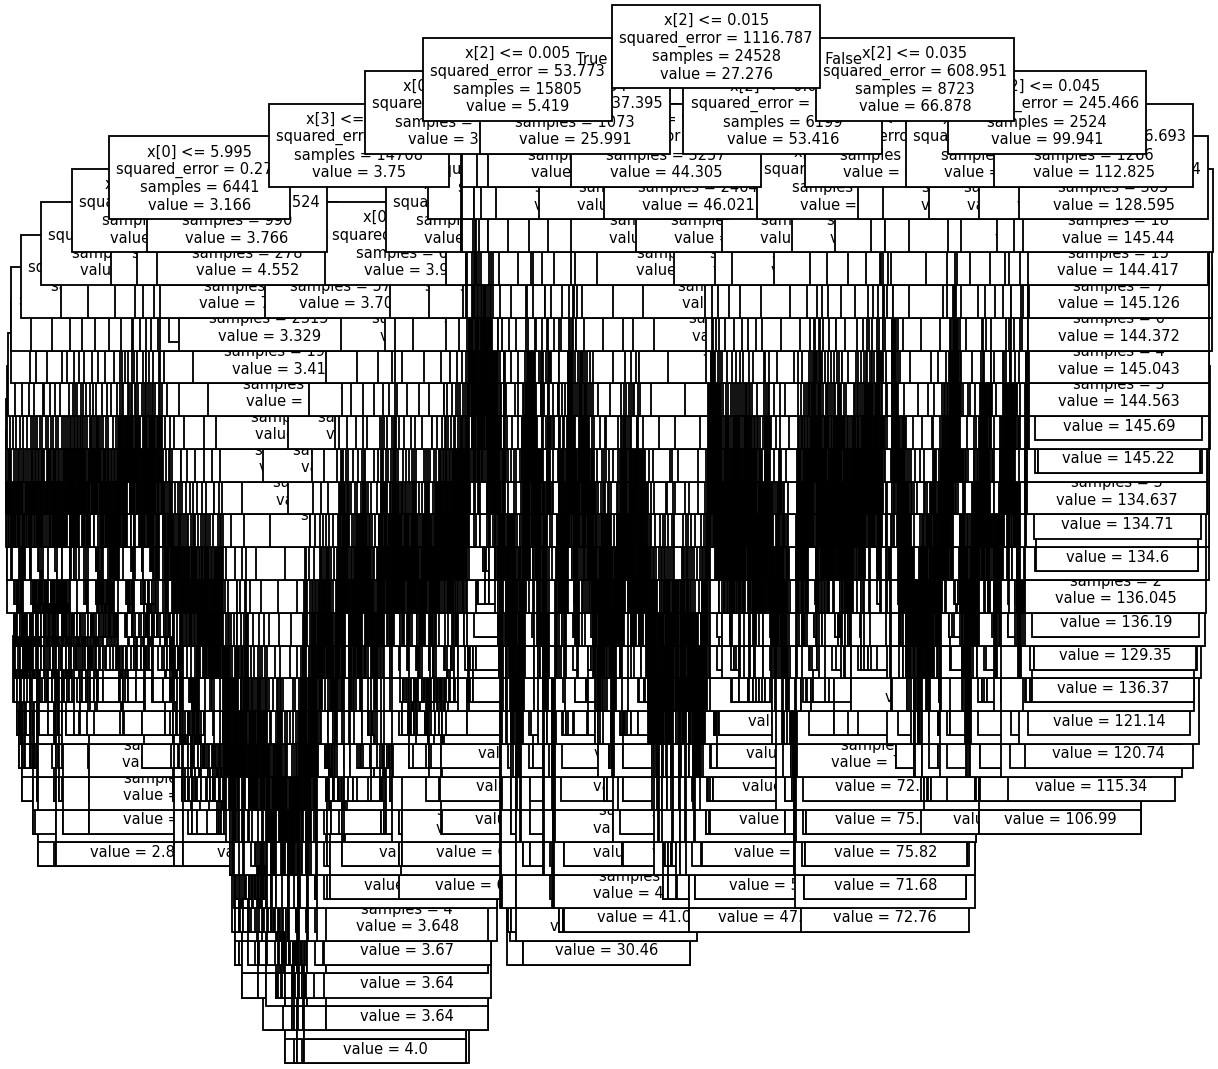

In [ ]:
plt.figure(figsize=(10, 10), dpi=132)
plot_tree(model, fontsize=8)
plt.show()

In [ ]:
# Create Decision Tree Regressor object
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

# Train Decision Tree Regressor
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.9804074386089767

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

2.7158442732115677

In [ ]:
mean_squared_error(y_test,y_pred)

21.99036275922755

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(4.689388313973108)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.14400863013303553


14.400863013303553

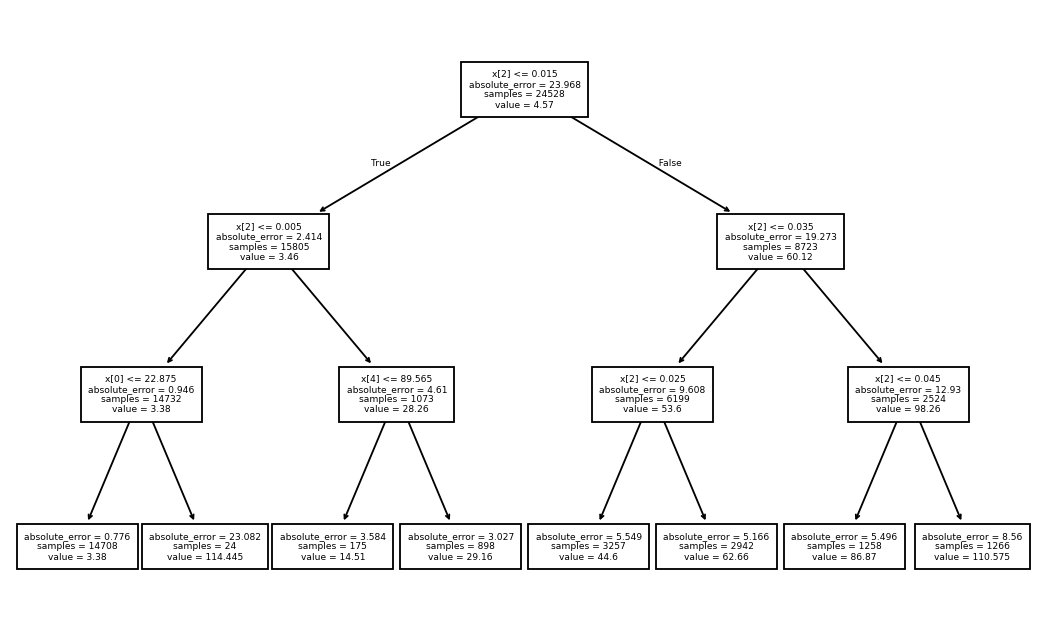

In [ ]:
plt.figure(figsize=(10, 6), dpi=132)
plot_tree(clf, fontsize=5)
plt.show()

# ***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([  2.8729,  60.824 , 121.3873, ...,   3.0563,   2.5892,   4.3874])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
11356,2.8729,2.88
26543,60.8240,60.77
2445,121.3873,120.42
14649,3.1336,3.13
32699,58.7096,58.86
...,...,...
11149,3.0575,3.06
11558,3.1712,3.17
27673,3.0563,3.06
20857,2.5892,2.59


In [ ]:
r2_score(y_test,y_pred)

0.9989733304785182

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.3403922564687967

In [ ]:
mean_squared_error(y_test,y_pred)

1.1523166757343972

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.0734601416607872)

In [ ]:

mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.011235692303109335


1.1235692303109335

In [ ]:
# Create Random Forest Regressor object
clf = RandomForestRegressor(n_estimators=100, criterion="poisson", max_depth=15, bootstrap=True)

# Train Random Forest Regressor
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.998772429602729

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.41442402530262523

In [ ]:
mean_squared_error(y_test,y_pred)

1.377804453931408

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.1737991540001245)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.016818398854183233


1.6818398854183232

# ***Bagging***

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
model = BaggingRegressor()

In [ ]:
model.fit(X_train, y_train)

BaggingRegressor()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([  2.887,  60.6  , 121.45 , ...,   3.046,   2.587,   4.389])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
11356,2.887,2.88
26543,60.600,60.77
2445,121.450,120.42
14649,3.131,3.13
32699,58.902,58.86
...,...,...
11149,3.089,3.06
11558,3.173,3.17
27673,3.046,3.06
20857,2.587,2.59


In [ ]:
r2_score(y_test,y_pred)

0.9988321566274662

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.3927777777777778

In [ ]:
mean_squared_error(y_test,y_pred)

1.3107678417047184

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.1448876982939062)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.012783033744113674


1.2783033744113674

In [ ]:
# Create Bagging Regressor object
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=18, random_state=42)
br = BaggingRegressor(estimator=base_estimator, n_estimators=20, bootstrap=True)

# Train Bagging Regressor
br = br.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.9989565148570622

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.3695643501483253

In [ ]:
mean_squared_error(y_test,y_pred)

1.1711902476202782

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.082215434939032)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.01444625046979783


1.444625046979783

# ***Boosting***

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = AdaBoostRegressor()

In [ ]:
model.fit(X_train,y_train)

AdaBoostRegressor()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([  8.32313144,  66.36716039, 122.36629982, ...,   8.32313144,
         8.32313144,   8.32313144])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
11356,8.323131,2.88
26543,66.367160,60.77
2445,122.366300,120.42
14649,8.561342,3.13
32699,63.849374,58.86
...,...,...
11149,8.323131,3.06
11558,11.189526,3.17
27673,8.323131,3.06
20857,8.323131,2.59


In [ ]:
r2_score(y_test,y_pred)

0.973430760982017

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

4.860568739260761

In [ ]:
mean_squared_error(y_test,y_pred)

29.820868878826747

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(5.4608487324615345)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.9064198131338903


90.64198131338902

In [ ]:
# Create Boosting Regressor object
from sklearn.ensemble import RandomForestRegressor
base_estimator = RandomForestRegressor(max_depth=12, random_state=42)
br = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, learning_rate=0.05, loss='linear') #'linear', 'square', 'exponential'

# Train Boosting Regressor
br = br.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.998701729564238

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.5466018204776346

In [ ]:
mean_squared_error(y_test,y_pred)

1.4571569930141404

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.207127579427353)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape

0.034823228932261016


0.034823228932261016

# ***GradientBoost***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([  3.10585058,  63.77110532, 126.4914119 , ...,   3.1860969 ,
         3.1860969 ,   3.74157393])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
11356,3.105851,2.88
26543,63.771105,60.77
2445,126.491412,120.42
14649,3.381550,3.13
32699,61.347351,58.86
...,...,...
11149,3.723582,3.06
11558,3.820966,3.17
27673,3.186097,3.06
20857,3.186097,2.59


In [ ]:
r2_score(y_test,y_pred)

0.9923081221414638

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

1.7748730584368138

In [ ]:
mean_squared_error(y_test,y_pred)

8.633234880988043

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(2.9382366958752733)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.1091163109306905


10.911631093069051

In [ ]:
# Create Boosting Regressor object
br = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='quantile', criterion='squared_error') #'quantile', 'huber', 'absolute_error', 'squared_error'

# Train Boosting Regressor
br = br.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.964554363732066

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

3.6603619333344244

In [ ]:
mean_squared_error(y_test,y_pred)

39.78358848581299

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(6.30742328417976)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.1861979361681606


18.61979361681606

# ***XGBoost***

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([  2.85644  ,  60.97021  , 121.760796 , ...,   3.099519 ,
         2.680432 ,   4.3796573], dtype=float32)

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
11356,2.856440,2.88
26543,60.970211,60.77
2445,121.760796,120.42
14649,3.143492,3.13
32699,57.645756,58.86
...,...,...
11149,3.009591,3.06
11558,3.249453,3.17
27673,3.099519,3.06
20857,2.680432,2.59


In [ ]:
r2_score(y_test,y_pred)

0.9990435345821942

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.47406049610998713

In [ ]:
mean_squared_error(y_test,y_pred)

1.0735207655820842

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.0361084719188838)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.024707121188598427


2.4707121188598427

In [ ]:
# Create Boosting Regressor object
br = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, n_jobs=-1)

# Train Boosting Regressor
br = br.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.9982007619537662

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.7121652081577019

In [ ]:
mean_squared_error(y_test,y_pred)

2.019434648550472

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.4210681364911648)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.04211923793669647


4.211923793669647

# ***Variance Inflation Factor (VIF)***

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,Lagging_Current_Reactive.Power_kVarh,9.395681
1,Leading_Current_Reactive_Power_kVarh,8.002185
2,CO2(tCO2),12.438413
3,Lagging_Current_Power_Factor,38.201673
4,Leading_Current_Power_Factor,21.742471
5,NSM,7.281770
6,WeekStatus,4.338907
7,Load_Type_Maximum_Load,2.728147
8,Load_Type_Medium_Load,3.205997


In [ ]:
#recalculate VIF
def recalc(x):
    vif_data = pd.DataFrame()
    vif_data["feature"] = x.columns
    vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                      for i in range(x.shape[1])]
    print(vif_data)

In [ ]:
X = X.drop(columns=['Lagging_Current_Power_Factor','Leading_Current_Power_Factor'], errors='ignore')
recalc(X)

                                feature        VIF
0  Lagging_Current_Reactive.Power_kVarh   8.720209
1  Leading_Current_Reactive_Power_kVarh   2.011188
2                             CO2(tCO2)  10.377907
3                                   NSM   4.927208
4                            WeekStatus   2.774214
5                Load_Type_Maximum_Load   2.722892
6                 Load_Type_Medium_Load   3.149356


In [ ]:
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Load_Type_Maximum_Load', 'Load_Type_Medium_Load'],
      dtype='object')

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                feature        VIF
0  Lagging_Current_Reactive.Power_kVarh   8.720209
1  Leading_Current_Reactive_Power_kVarh   2.011188
2                             CO2(tCO2)  10.377907
3                                   NSM   4.927208
4                            WeekStatus   2.774214
5                Load_Type_Maximum_Load   2.722892
6                 Load_Type_Medium_Load   3.149356


In [ ]:
y = df['Usage_kWh']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
model = SVR()
param_grid = {'kernel': ['linear', 'poly', 'rbf']}

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9982007619537662


In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)

MAPE: 0.04211923793669647


In [ ]:
results_vif = []

def evaluate_model(model, name, x_test=None, y_test=None):
    """
    Evaluates a trained model on training or test data.
    """
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np

    # Use test data if provided, otherwise training data
    if x_test is None or y_test is None:
        X, Y = X_train, y_train
    else:
        X, Y = x_test, y_test

    # Predictions
    y_pred = model.predict(X).flatten()

    # Metrics
    mae = mean_absolute_error(Y, y_pred)
    mse = mean_squared_error(Y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y, y_pred)

    # Print results
    print(f"\nModel: {name}")
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

    # Store results in dictionary for comparison later
    results_vif.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
    })

In [ ]:
#Linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
evaluate_model(model, "Linear Regression", X_test, y_test)


Model: Linear Regression
MAE: 2.6193, RMSE: 4.2961, R²: 0.9838


In [ ]:
# SVR
model = SVR(kernel='poly')
model.fit(X_train, y_train)
evaluate_model(model, "svr", X_test, y_test)


Model: svr
MAE: 24.4592, RMSE: 40.9261, R²: -0.4735


In [ ]:
#random forest
model = RandomForestRegressor(max_depth=10, n_estimators=150, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)
evaluate_model(model, "Random Forest", X_test, y_test)



Model: Random Forest
MAE: 1.9676, RMSE: 3.3206, R²: 0.9903


In [ ]:
results_vif = pd.DataFrame(results_vif)
print(results_vif)

               Model        MAE       RMSE  R2 Score
0  Linear Regression   2.619262   4.296110  0.983763
1                svr  24.459242  40.926114 -0.473488
2      Random Forest   1.967588   3.320583  0.990300


# ***ANN***

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs= 10, verbose=1)

Epoch 1/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1074.5802 - mae: 1074.5802
Epoch 2/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 26.5203 - mae: 26.5203
Epoch 3/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 21.9596 - mae: 21.9596
Epoch 4/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20.2445 - mae: 20.2445
Epoch 5/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 20.3926 - mae: 20.3926
Epoch 6/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20.2978 - mae: 20.2978
Epoch 7/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17.8105 - mae: 17.8105
Epoch 8/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 24.7022 - mae: 24.7022
Epoch 9/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.3775 - mae: 22.3775
Epoch 10/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18.2597 - mae: 18.2597


In [ ]:
model.evaluate(X_test, y_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.5142 - mae: 19.5142


[19.493986129760742, 19.493986129760742]

In [ ]:
model.summary();

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (32, 10)               │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 5)                │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 1)                │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 284 (1.11 KB)

Text(0.5, 0, 'epochs')

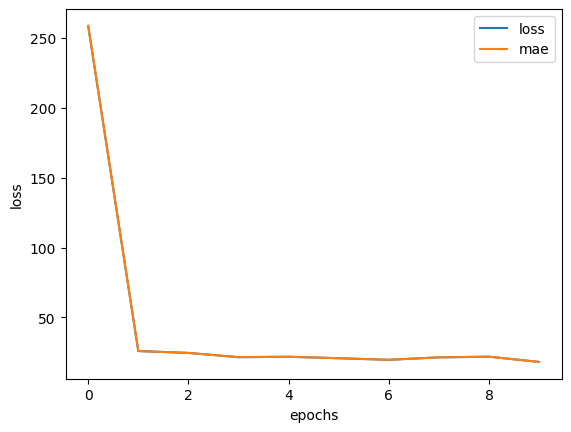

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model

model1.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
    ]
)


# STEP1: Fit the model

history= model1.fit(X_train, y_train, epochs= 200, verbose=0)

In [ ]:
model1.evaluate(X_test, y_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.4311 - mae: 24.4311 - mape: 59.5229 - mse: 1670.5107


[24.430334091186523, 24.430334091186523, 1670.57568359375, 59.43486022949219]

Text(0.5, 0, 'epochs')

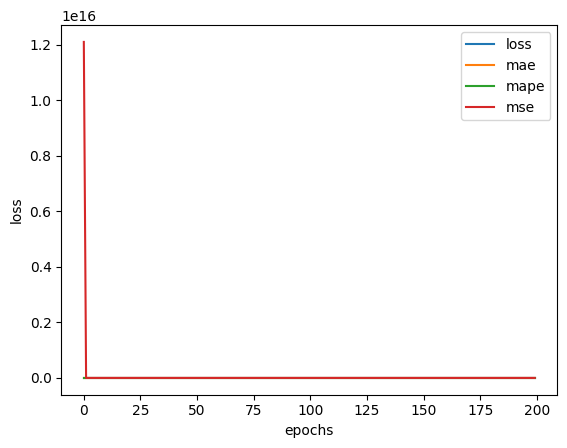

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model

model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[ tf.keras.metrics.MeanAbsoluteError(name="mae")
    ]
)

# STEP1: Fit the model

history= model2.fit(X_train, y_train, epochs= 500)

Epoch 1/500
876/876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 55.9040 - mae: 55.9040
Epoch 2/500
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.9322 - mae: 22.9322
Epoch 3/500
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18.2020 - mae: 18.2020
Epoch 4/500
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.5915 - mae: 15.5915
Epoch 5/500
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13.2525 - mae: 13.2525
Epoch 6/500
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13.1554 - mae: 13.1554
Epoch 7/500
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.7496 - mae: 12.7496
Epoch 8/500
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12.0911 - mae: 12.0911
Epoch 9/500
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11.6203 - mae: 11.6203
Epoch 10/500
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 11.9866 - mae: 11.9866
Epoch 11/500
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11.5512 - mae: 11.5512
Epoch 12/500
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11.1183 - ma

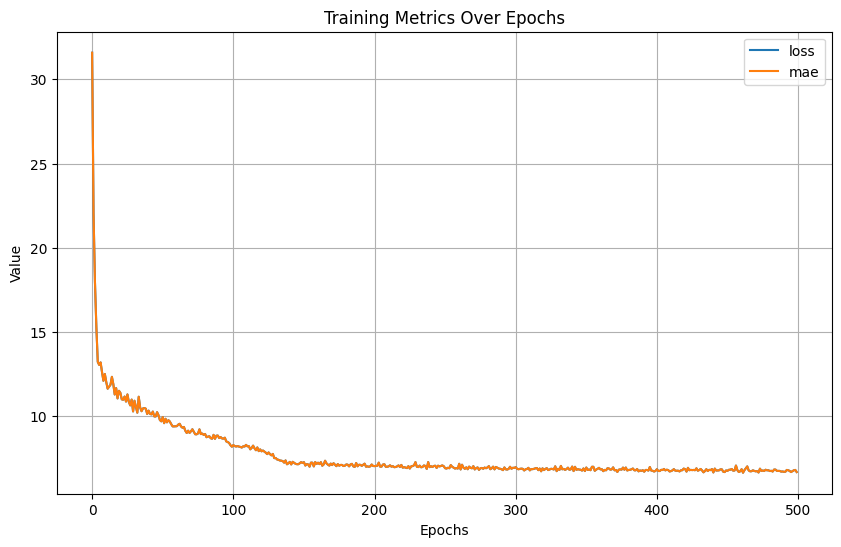

In [ ]:
# Convert training history to DataFrame
history_df = pd.DataFrame(history.history)

# Plot all metrics
history_df.plot(figsize=(10, 6))

# Add title and labels
plt.title("Training Metrics Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
model2.evaluate(X_test, y_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5174 - mae: 6.5174


[6.765292167663574, 6.765292167663574]

In [ ]:
model.summary();

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (32, 10)               │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 5)                │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 1)                │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 284 (1.11 KB)

In [ ]:
def evaluate_model(model, model_name, x_test=None, y_test=None):
    """
    Evaluates a trained model on training or test data.
    """
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np

    # Use test data if provided, otherwise training data
    if x_test is None or y_test is None:
        X, Y = x_train, y_train
    else:
        X, Y = x_test, y_test

    # Predictions
    y_pred = model.predict(X).flatten()

    # Metrics
    mae = mean_absolute_error(Y, y_pred)
    mse = mean_squared_error(Y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y, y_pred)

    # Print results
    print(f"\nModel: {model_name}")
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

    # Store results in dictionary for comparison later
    results_ann.append({
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
    })


# ***Different Train test splits (80-20,75-25,60-40)***

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# ========== Best ANN ==========
def build_best_ann(input_dim):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    return model

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ========== Models ==========
def get_models():
    return {
        "Linear Regression": LinearRegression(),
        "KNN": KNeighborsRegressor(),
        "SVR": SVR(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Bagging": BaggingRegressor(random_state=42),
        "AdaBoost": AdaBoostRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "XGBoost": xgb.XGBRegressor(random_state=42, verbosity=0)
    }

# ========== Evaluation ==========
def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred)
    }

# ========== Run for different splits ==========
splits = [0.20, 0.25,0.40]
all_results = []

for test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    models = get_models()

    # ---- ML Models ----
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics = evaluate_model(y_test, y_pred)
        metrics["Model"] = name
        metrics["Test_Size"] = f"{int((1-test_size)*100)}-{int(test_size*100)}"
        all_results.append(metrics)

    # ---- Best ANN ----
    ann = build_best_ann(X_train.shape[1])
    ann.compile(optimizer='adam', loss='mse', metrics=['mae'])
    ann.fit(X_train, y_train,
            validation_split=0.2,
            epochs=200, batch_size=32,
            callbacks=[early_stop],
            verbose=0)

    y_pred_ann = ann.predict(X_test).flatten()
    metrics = evaluate_model(y_test, y_pred_ann)
    metrics["Model"] = "Best ANN"
    metrics["Test_Size"] = f"{int((1-test_size)*100)}-{int(test_size*100)}"
    all_results.append(metrics)

In [ ]:
# Convert results into DataFrame (run this once after your training loop)
results_df = pd.DataFrame(all_results)

# Show results separately for each test split
for split in results_df["Test_Size"].unique():
    split_df = results_df[results_df["Test_Size"] == split].drop(columns=["Test_Size"])
    print(f"\n===== Results for Split {split} =====\n")
    display(split_df)

    # Optional: quick bar chart for R² comparison
    split_df.plot(x="Model", y="R2", kind="bar", title=f"R² Scores ({split} Split)")
    plt.show()

In [ ]:
# ========== Best ANN ==========
def build_best_ann(input_dim):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    return model

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ========== Models ==========
def get_models():
    return {
        "Linear Regression": LinearRegression(),
        "KNN": KNeighborsRegressor(),
        "SVR": SVR(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Bagging": BaggingRegressor(random_state=42),
        "AdaBoost": AdaBoostRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "XGBoost": xgb.XGBRegressor(random_state=42, verbosity=0)
    }

# ========== Evaluation ==========
def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred)
    }

# ========== Run for different splits ==========
splits = [0.20, 0.25, 0.30,0.40]
all_results = []

for test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    models = get_models()

    # ---- ML Models ----
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics = evaluate_model(y_test, y_pred)
        metrics["Model"] = name
        metrics["Test_Size"] = f"{int((1-test_size)*100)}-{int(test_size*100)}"
        all_results.append(metrics)

    # ---- Best ANN ----
    ann = build_best_ann(X_train.shape[1])
    ann.compile(optimizer='adam', loss='mse', metrics=['mae'])
    ann.fit(X_train, y_train,
            validation_split=0.2,
            epochs=200, batch_size=32,
            callbacks=[early_stop],
            verbose=0)

    y_pred_ann = ann.predict(X_test).flatten()
    metrics = evaluate_model(y_test, y_pred_ann)
    metrics["Model"] = "Best ANN"
    metrics["Test_Size"] = f"{int((1-test_size)*100)}-{int(test_size*100)}"
    all_results.append(metrics)

In [ ]:
# Convert results into DataFrame (run this once after your training loop)
results_df = pd.DataFrame(all_results)

# Show results separately for each test split
for split in results_df["Test_Size"].unique():
    split_df = results_df[results_df["Test_Size"] == split].drop(columns=["Test_Size"])
    print(f"\n===== Results for Split {split} =====\n")
    display(split_df)

    # Optional: quick bar chart for R² comparison
    split_df.plot(x="Model", y="R2", kind="bar", title=f"R² Scores ({split} Split)")
    plt.show()

# ***ANN Variants***

In [ ]:
# Model 1 - Deep with ELU + Adam (lower LR)

# Build the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='elu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(1, activation='linear')  # regression output
])

# Compile
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),
    loss='mse',
    metrics=['mae']
)

# Train
history1 = model1.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)

# Predict
y_pred1 = model1.predict(X_test).flatten()

# Evaluate
metrics1 = evaluate_model(y_test, y_pred1)
metrics1["Model"] = "ANN - Deep ELU Adam"
print(metrics1)


In [ ]:
# Model 2 - Simple with tanh + RMSprop
# Build the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(1, activation='linear')  # regression output
])

# Compile
model2.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train
history2 = model2.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)

# Predict
y_pred2 = model2.predict(X_test).flatten()

# Evaluate
metrics2 = evaluate_model(y_test, y_pred2)
metrics2["Model"] = "ANN - Simple tanh RMSprop"
print(metrics2)


In [ ]:
# Model 3 - Simple with SELU + Nadam

# Build the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='selu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='selu'),
    tf.keras.layers.Dense(1, activation='linear')  # regression output
])

# Compile
model3.compile(
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train
history3 = model3.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)

# Predict
y_pred3 = model3.predict(X_test).flatten()

# Evaluate
metrics3 = evaluate_model(y_test, y_pred3)
metrics3["Model"] = "ANN - Simple SELU Nadam"
print(metrics3)


In [ ]:
# Model 4 - Complex with Dropout + ReLU + Adam

# Build the model
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),   # 30% dropout
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # regression output
])

# Compile
model4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train
history4 = model4.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    verbose=0
)

# Predict
y_pred4 = model4.predict(X_test).flatten()

# Evaluate
metrics4 = evaluate_model(y_test, y_pred4)
metrics4["Model"] = "ANN - Complex ReLU Dropout Adam"
print(metrics4)


In [ ]:
# Model 5 - Large Dropout + SELU + RMSprop

# Build the model
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='selu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.4),   # 40% dropout
    tf.keras.layers.Dense(128, activation='selu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(1, activation='linear')  # regression output
])

# Compile
model5.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train
history5 = model5.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=0
)

# Predict
y_pred5 = model5.predict(X_test).flatten()

# Evaluate
metrics5 = evaluate_model(y_test, y_pred5)
metrics5["Model"] = "ANN - Large SELU Dropout RMSprop"
print(metrics5)


In [ ]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(all_results)

# Display the results, sorted by R2 score
print("\n===== Model Comparison =====\n")
display(results_df.sort_values(by="R2", ascending=False))

In [ ]:
# Melt the DataFrame for easier plotting
results_melted = results_df.melt(id_vars=["Model", "Test_Size"],
                                 var_name="Metric",
                                 value_name="Score")

# Create subplots for each metric
metrics_to_plot = ["R2", "RMSE", "MAE", "MAPE"]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics_to_plot):
    sns.barplot(x="Model", y="Score", hue="Test_Size", data=results_melted[results_melted["Metric"] == metric], ax=axes[i])
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].legend(title="Train-Test Split")
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Find the row with the highest R2 score
best_model_row = results_df.loc[results_df["R2"].idxmax()]

# Display the best model's results
print("\n===== Best Model Performance =====\n")
display(best_model_row)

In [ ]:
# Filter the results for the best performing model
best_model_name = results_df.loc[results_df["R2"].idxmax()]["Model"]
best_model_results = results_df[results_df["Model"] == best_model_name]

# Melt the filtered DataFrame for easier plotting
best_model_melted = best_model_results.melt(id_vars=["Model", "Test_Size"],
                                             var_name="Metric",
                                             value_name="Score")

# Create subplots for each metric
metrics_to_plot = ["R2", "RMSE", "MAE", "MAPE"]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, metric in enumerate(metrics_to_plot):
    sns.barplot(x="Test_Size", y="Score", data=best_model_melted[best_model_melted["Metric"] == metric], ax=axes[i])
    axes[i].set_title(f"{metric} for {best_model_name}")
    axes[i].set_xlabel("Train-Test Split")
    axes[i].set_ylabel(metric)
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Function to evaluate a model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape, "R²": r2}

# Collect results for different models
results = []

# Example: if you trained models as model1, model2, model3...
for name, model, epochs in [
    ("ANN - Deep ELU Adam", model1, 100),
    ("ANN - Simple tanh RMSprop", model2, 100),
    ("ANN - Simple SELU Nadam", model3, 100),
    ("ANN - Complex ReLU Dropout Adam", model4, 150),
    ("ANN - Large Dropout SELU RMSprop", model5, 200),
]:
    y_pred = model.predict(X_test).flatten()
    metrics = evaluate_model(y_test, y_pred)
    metrics["Model"] = name
    metrics["Split"] = "70-30"
    metrics["Epochs"] = epochs
    results.append(metrics)

# Create DataFrame
results_df = pd.DataFrame(results)

# Round values for readability
results_df = results_df.round(4)

# Reorder columns
results_df = results_df[["Split", "Model", "Epochs", "MAE", "MAPE", "R²", "RMSE", "MSE"]]

# Display table
print("=== ANN Models Evaluation Summary ===")
print(results_df)

# Optional: save to CSV
results_df.to_csv("ANN_results_summary.csv", index=False)


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Function to build ANN model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mae',
                  metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                           tf.keras.metrics.MeanAbsolutePercentageError(name="mape")])
    return model

# Splits and epochs to test
splits = [(0.4, "60-40"), (0.3, "70-30"), (0.25, "75-25"), (0.2, "80-20")]
epochs_list = [200, 300, 500]

results = []

for test_size, split_name in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for ep in epochs_list:
        model = build_model()
        history = model.fit(X_train, y_train, epochs=ep, verbose=0, validation_split=0.1)

        # Predict
        y_pred = model.predict(X_test).flatten()

        # Metrics
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        results.append({
            "Split": split_name,
            "Architecture": "64-32-1",
            "Epochs": ep,
            "MAE": round(mae, 2),
            "MAPE": round(mape, 2)
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show results like Fig 2
print("=== Neural Network Results (Adam Optimizer) ===")
print(results_df)

# Save for later (optional)
results_df.to_csv("NN_results_summary.csv", index=False)


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Neural Network Results (Adam Optimizer) ===
    Split Architecture  Epochs   MAE  MAPE
0   60-40      64-32-1     200  7.26  0.43
1   60-40      64-32-1     300  7.30  0.49
2   60-40      64-32-1     500  7.79  0.36
3   70-30      64-32-1     200  9.09  0.71
4   70-30      64-32-1     300  6.61  0.34
5   70-30      64-32-1     500  6.28  0.21
6   75-25      64-32-1     200  8.01  0.25
7   75-25      64-32-1     300  7.30  0.54
8   75-25      64-32-1     500  6.27  0.36
9   80-20      64-32-1     200